Problem Statement:-
We want to predict how much money we should budget for sales commissions for the next year.
We have a defined formula for calculating commissions and we likely have some experience with prior years’ commissions payments.

This problem is important from a business perspective. Sales commissions can be a large selling expense and it is important to plan appropriately for this expense.

"Note- the given prerequired data is itself a simulation of real world data"

In this example, the sample sales commission would look like this for a 500 person sales force:


In [1]:
#First of all, importing important libraries:

import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [42]:
# analysing the data we have for current year

s_df = pd.read_csv('d:/f_sales_rep')
h_df = pd.read_csv('d:/rep_history')

#adjusting some unname column and getting it clear to understand

s_df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
s_df.drop(['a'],axis=1,inplace=True)

h_df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
h_df.drop(['a'],axis=1,inplace=True)

This is the performance data of 500 sales reps. for this year and we need to predict the "Budget required for Total Commission Amount" for next year.

In [44]:
s_df

,Sales_Target,Pct_To_Target,Sales,Commission_Rate,Commission_Amount
0,100000,111.0,111000.0,4,4440.0
1,100000,98.0,98000.0,3,2940.0
2,100000,110.0,110000.0,4,4400.0
3,100000,96.0,96000.0,3,2880.0
4,500000,111.0,555000.0,4,22200.0
...,...,...,...,...,...
495,100000,82.0,82000.0,2,1640.0
496,100000,83.0,83000.0,2,1660.0
497,500000,110.0,550000.0,4,22000.0
498,100000,111.0,111000.0,4,4440.0


In [46]:
#Our total Commission given this year is

s_df['Commission_Amount'].sum()

3064330.0

Exploring given data-
Now, we have known the Total of Commission given in current year, we have are fortunate to have the historical data of percentage to target and sales target of sales reps. in previous years, we can use it to simulate the data for next year, and get the estimated total budget for Sales Commission for the company.

For finding the solution:
we can simply generate random number of percentage completed and multiply it with the target that gets us actual sales of simulation, then we use that information to get the commission estimate for 1 such simulation, now for getting a estimate of average total comission we can use this simulation multiple times to get closure to accuracy as possible. 

In [ ]:
Given Commission Rate is distributed as:-
    0-90%  = 2%
    91-99% = 3%
    >=100% = 4%

E:\Softwareinstalled\Anacondaforpython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual target distribution')

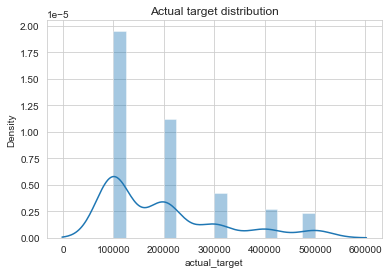

In [54]:
sns.distplot(h_df['actual_target']).set_title('Actual target distribution')

From this we found that there is a ration between targets are divided most of targets belongs to 100000 followed by other, they can be randomise using their probability of occurance.

E:\Softwareinstalled\Anacondaforpython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Completion percentage')

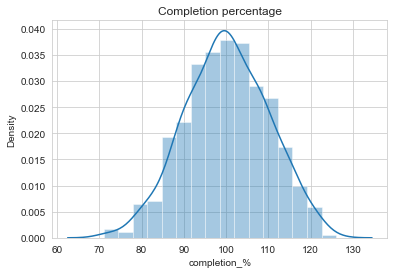

In [51]:
sns.distplot(h_df['completion_%']).set_title('Completion percentage')

From the plot we can able to see that this is a normal distribution and the peak is at mean and mode of the data which is approx 100 and varience is 10 (we can find it using basics of normal distribution where curve is symmetric and mean+3 sigma covers 99 percent of our data); 

This insight is useful because we can model our input variable distribution so that it is similar to our real world experience.

E:\Softwareinstalled\Anacondaforpython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Percent to Target Distribution')

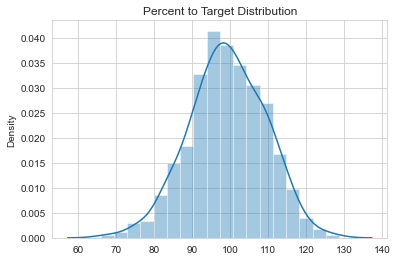

In [52]:
#Now we need to generate Random numbers for percentages using scipy function

mean = 100
std_dev = 10
num_reps = 500

pct_to_target = norm.rvs(mean, std_dev, num_reps).round(1)
sns.distplot(pct_to_target).set_title('Percent to Target Distribution')

As we can see that the random numbers are generated actually dipicts the actual data with same normal distribtuion

In [55]:
# time to generate random data of target using their occurance probability

sales_target_values = [100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.5, .25, .15, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [56]:
#putting 1st simulated data of target and achieved percentage in a DataFrame

df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

# Calculate sales
df['Sales'] = df['Sales_Target']*df['Pct_To_Target']/100

In [57]:
# I am defining a function to calculate commission percentage on basis of given information by company

def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    # Your code here

    if 0 < x <= 90:
        return 2
    elif x<=99:
        return 3
    else:
        return 4

In [58]:
# applying the function and adding the required data to dataframe

df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate']*df['Sales']/100

In [59]:
# this is the sum of total commission given for our simulation
df['Commission_Amount'].sum()

3230635.0

The real “magic” of the "Monte Carlo simulation" is that if we run a simulation many times, we start to develop a picture of the likely distribution of results.

In [60]:
# Basically we are running a for loop to do 1000 simulation and store all total commission
# for each simulation in a dataframe to further analyse the data.

num_simulations = 1000

# Define a dataframe to keep all the results from each simulation that we want to analyze
results_df = pd.DataFrame()

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    mean = 100
    std_dev = 10
    num_reps = 500
    pct_to_target = norm.rvs(mean, std_dev, num_reps).round(1)
    sales_target_values = [100_000, 200_000, 300_000, 400_000, 500_000]
    sales_target_prob = [.5, .25, .15, .05, .05]
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,'Sales_Target': sales_target})


    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Sales_Target']*df['Pct_To_Target']/100  

    # Determine the commissions rate and calculating
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate']*df['Sales']/100

    # We want to track sales,commission amounts and sales targets over all the simulations

    results_df = results_df.append({'total_target':df['Sales_Target'].sum(), 'total_sales':df['Sales'].sum(), 'total_commission':df['Commission_Amount'].sum()},ignore_index=True)


E:\Softwareinstalled\Anacondaforpython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_commission', ylabel='Density'>

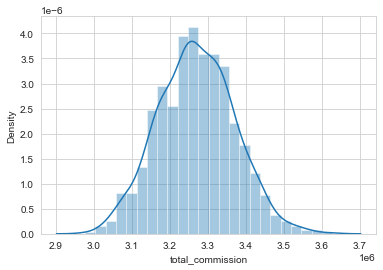

In [63]:
sns.distplot(results_df['total_commission'])

In [64]:
results_df.describe().style.format('{:,}')

,total_target,total_sales,total_commission
count,"1,000.0","1,000.0","1,000.0"
mean,"94,934,200.0","94,947,656.7","3,269,083.744"
std,"2,582,514.2283712085","2,602,539.389844251","100,131.60689268589"
min,"87,300,000.0","87,149,900.0","2,976,401.0"
25%,"93,000,000.0","93,078,375.0","3,196,518.75"
50%,"94,900,000.0","94,956,900.0","3,266,518.5"
75%,"96,600,000.0","96,653,725.0","3,337,029.0"
max,"103,900,000.0","104,240,300.0","3,626,583.0"


Now after running a loop for 1000 times, we can say that the mean of the data which is 3,269,083.744 approximately best fit our budget for next year, using this technique of 'Monte Carlo Simulation" we can solve many complex problems.